# Cumulative Token, Type, and TTR analysis
One of the supposed features of feminine language is a more complex vocabulary. Is this generally true? Is it true for specific production companies?


In [1]:
import pandas as pd

In [2]:
import math

In [3]:
from matplotlib import pyplot as plt

In [4]:
%pprint

Pretty printing has been turned OFF


In [5]:
all_movies_df = pd.read_pickle(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\private\char_toks.pkl")

In [6]:
all_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 11 columns):
Disney_Period       632 non-null object
Gender              632 non-null object
Movie               632 non-null object
Role                632 non-null object
Speaker             632 non-null object
Speaker_Status      632 non-null object
Total_Tok_Count     632 non-null float64
Total_Toks          632 non-null object
Total_Type_Count    632 non-null float64
Total_Types         632 non-null object
Year                632 non-null object
dtypes: float64(2), object(9)
memory usage: 32.1+ KB


In [7]:
all_movies_df.groupby('Gender')['Total_Tok_Count'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,139.0,347.848921,554.563700,2.0,10.5,63.0,446.5,2540.0
m,354.0,314.223164,631.755182,2.0,10.0,45.0,269.5,3941.0
n,139.0,20.949640,40.650387,1.0,6.0,10.0,23.0,412.0


## Adding TTR
I'm going to add a TTR column and Guiraud's modified TTR.

In [8]:
all_movies_df['TTR'] = all_movies_df.Total_Type_Count / all_movies_df.Total_Tok_Count
all_movies_df['G_TTR'] = all_movies_df.Total_Type_Count / (all_movies_df.Total_Tok_Count.map(math.sqrt))

In [9]:
all_movies_df.head()

,Disney_Period,Gender,Movie,Role,Speaker,Speaker_Status,Total_Tok_Count,Total_Toks,Total_Type_Count,Total_Types,Year,TTR,G_TTR
0,EARLY,f,Snow White,ANT,queen,NON-P,940.0,"[slave, in, the, magic, mirror, come, from, th...",314.0,"{dumb, hands, queenly, behold, thy, 've, nothi...",1937,0.334043,10.241551
1,EARLY,m,Snow White,ANT,mirror,NON-P,81.0,"[what, wouldst, thou, know, ,, my, queen, ?, f...",57.0,"{fair, more, a, thy, land, alas, queen, woulds...",1937,0.703704,6.333333
2,EARLY,m,Snow White,PRO,prince,PRINCE,5.0,"[today, hello, ., one, song]",5.0,"{., one, hello, today, song}",1937,1.000000,2.236068
3,EARLY,f,Snow White,PRO,snow white,PRINCESS,1231.0,"[oh, !, oh, ., hello, there, ., what, 's, the,...",311.0,"{awfully, anywhere, hands, spring, chair, clea...",1937,0.252640,8.864033
4,EARLY,m,Snow White,ANT,guard,NON-P,95.0,"[yes, ,, your, majesty, ., but, ,, your, majes...",43.0,"{anywhere, nothing, queen, jealous, your, hide...",1937,0.452632,4.411707


In [10]:
all_movies_df.describe()

,Total_Tok_Count,Total_Type_Count,TTR,G_TTR
count,632.000000,632.000000,632.000000,632.000000
mean,257.117089,85.189873,0.693138,4.967259
std,553.919315,134.593696,0.257380,2.995887
min,1.000000,1.000000,0.166667,0.632456
25%,8.000000,7.000000,0.481947,2.468528
50%,27.500000,21.000000,0.700877,4.024922
75%,174.500000,95.250000,1.000000,7.229228
max,3941.000000,886.000000,1.000000,14.136698


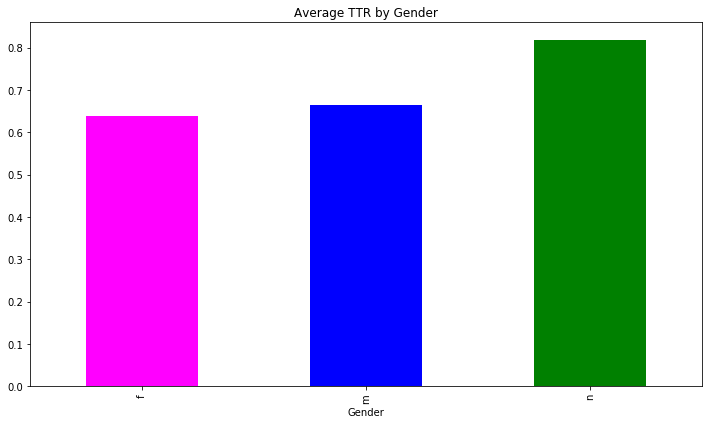

In [11]:
ttr_by_gender = all_movies_df.groupby(['Gender'])['TTR'].describe()['mean']
ttr_by_gender.plot.bar(color = ['magenta', 'blue', 'green'], figsize = (10,6))
plt.title("Average TTR by Gender")
plt.tight_layout()
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\overall_avg_ttr_gen.png")

If we view TTR as a measure of vocabulary complexity, it looks like overall men have a slightly higher vocabulary complexity.

In [12]:
#get rid of 'n'
all_movies_df_2 = all_movies_df[all_movies_df.Gender != 'n']

In [13]:
all_movies_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 0 to 631
Data columns (total 13 columns):
Disney_Period       493 non-null object
Gender              493 non-null object
Movie               493 non-null object
Role                493 non-null object
Speaker             493 non-null object
Speaker_Status      493 non-null object
Total_Tok_Count     493 non-null float64
Total_Toks          493 non-null object
Total_Type_Count    493 non-null float64
Total_Types         493 non-null object
Year                493 non-null object
TTR                 493 non-null float64
G_TTR               493 non-null float64
dtypes: float64(4), object(9)
memory usage: 36.6+ KB


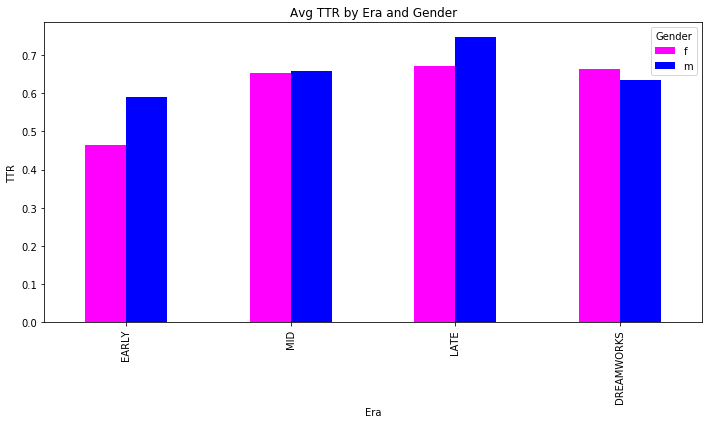

In [14]:
ttr_by_company_gender = all_movies_df_2.groupby(['Disney_Period', 'Gender'], sort=False)['TTR'].describe()['mean']
ttr_by_company_gender.unstack().plot.bar(color = ['magenta', 'blue', 'green'], figsize = (10,6))
plt.title('Avg TTR by Era and Gender')
plt.xlabel('Era')
plt.ylabel('TTR')
plt.tight_layout()
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\avg_ttr_era.png")

Hmmm. So, overall Female speakers have a higher TTR in Dreamworks movies, but in every Disney era, female speakers have a lower TTR. I would've thought that since Disney movies feature female protagonists, they would have higher TTRs. Maybe this is influenced by the length of their lines...If Dreamworks female characters aren't protagonists, their lines may not be as long, which would influence TTR?

Let's zoom into movies...

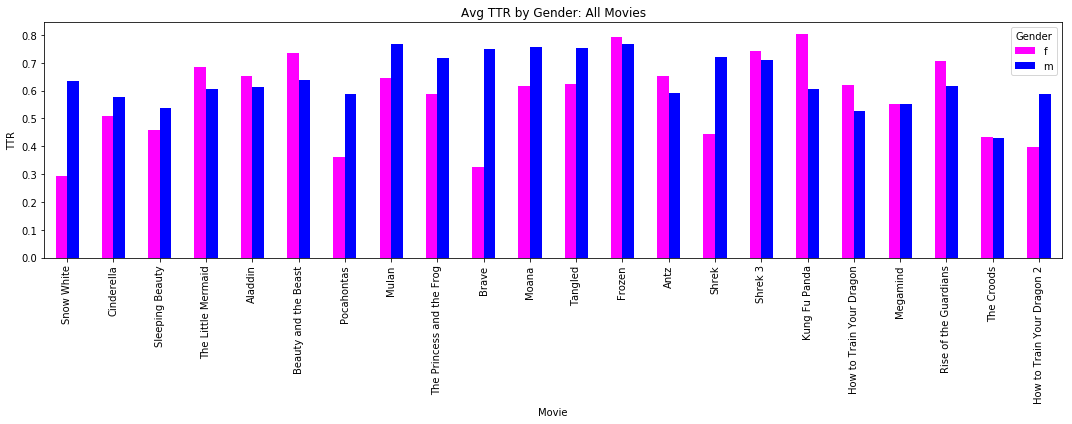

In [15]:
ttr_by_movie_gender = all_movies_df_2.groupby(['Movie', 'Gender'], sort=False)['TTR'].describe()['mean']
ttr_by_movie_gender.unstack().plot.bar(color = ['magenta', 'blue'], figsize = (15,6))
plt.xlabel('Movie')
plt.ylabel('TTR')
plt.title('Avg TTR by Gender: All Movies')
plt.tight_layout()
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\avg_ttr_gen_all.png")

In [17]:
all_movies_df_2 = all_movies_df[(all_movies_df.Role != 'N') & (all_movies_df.Gender != 'n')]

In [18]:
all_movies_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 0 to 631
Data columns (total 13 columns):
Disney_Period       216 non-null object
Gender              216 non-null object
Movie               216 non-null object
Role                216 non-null object
Speaker             216 non-null object
Speaker_Status      216 non-null object
Total_Tok_Count     216 non-null float64
Total_Toks          216 non-null object
Total_Type_Count    216 non-null float64
Total_Types         216 non-null object
Year                216 non-null object
TTR                 216 non-null float64
G_TTR               216 non-null float64
dtypes: float64(4), object(9)
memory usage: 16.0+ KB


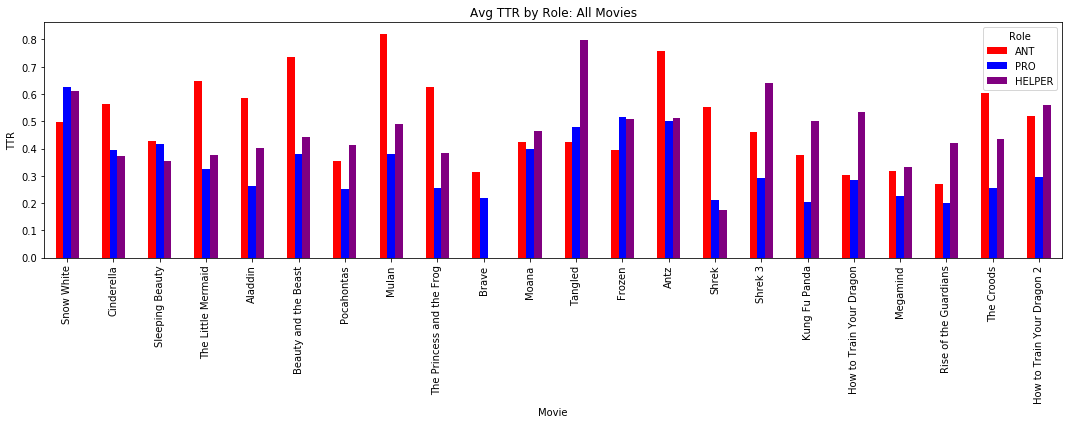

In [19]:
#looking at role...
ttr_by_movie_role = all_movies_df_2.groupby(['Movie', 'Role'], sort=False)['TTR'].describe()['mean']
ttr_by_movie_role.unstack().plot.bar(color = ['red', 'blue', 'purple'], figsize = (15,6))
plt.title('Avg TTR by Role: All Movies')
plt.ylabel('TTR')
plt.tight_layout()
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\avg_ttr_role_all.png")

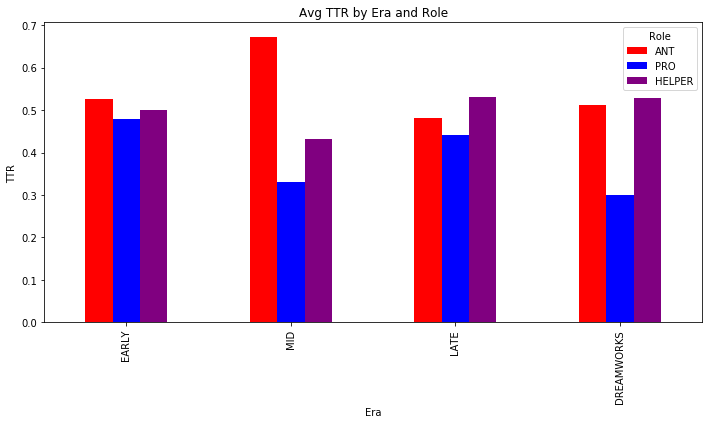

In [20]:
ttr_by_company_role = all_movies_df_2.groupby(['Disney_Period', 'Role'], sort=False)['TTR'].describe()['mean']
ttr_by_company_role.unstack().plot.bar(color = ['red', 'blue', 'purple'], figsize = (10,6))
plt.title('Avg TTR by Era and Role')
plt.xlabel('Era')
plt.ylabel('TTR')
plt.tight_layout()
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\avg_ttr_era_role.png")

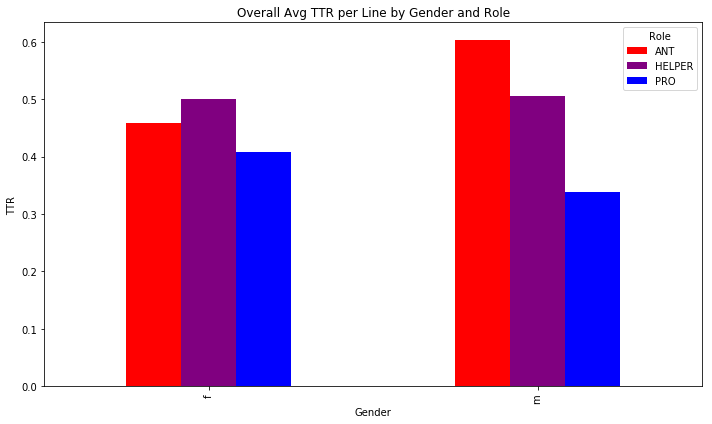

In [21]:
role_lines_3 = all_movies_df_2.groupby(['Gender', 'Role'])["TTR"].describe()["mean"]
role_lines_3.unstack().plot.bar(color=['red', 'purple', 'blue'], figsize = (10,6))
plt.title("Overall Avg TTR per Line by Gender and Role")
plt.ylabel('TTR')
plt.tight_layout()
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\avg_ttr_role_gender.png")

Here, we find that overall, antagonists have a higher TTR. Could this be because they have a more refined vocabulary than the protagonists? Or are their lines simply shorter, creating a higher TTR? The same may be said for helpers...

After line length analysis, we learn that villains' line lengths are actually slightly higher than average. So it looks like villains actually do have a more refined vocabulary.

## K-Bands
Another way to analyze vocabulary complexity is k-bands. I'll apply the following k-band code to each character's list of tokens to determine their average k-band. A higher k-band indicates a higher level of vocabulary complexity

In [22]:
import numpy as np

In [23]:

# thanks Na-Rae for this code!

def get_avg_google_kband(toks):
    """
    Computes the average K-band value from a list of tokens. 
    Limited to 20 K-bands: all words outside top 20,000 are excluded. 
    """
    kbands = []
    for t in toks:
        if t.lower() in google_1gram_rank: 
           grank = google_1gram_rank[t.lower()]
           if grank <= 50000:  # limiting to 50k 
               kband = math.floor(grank/1000)+1
               kbands.append(kband)
               #print(t, grank, kband)
    return np.mean(kbands)

In [24]:
# thanks Na-Rae for this code!

# reading file and setting up
# credit of the Google 1T English unigram frequency list goes to Peter Norbig's site: http://norvig.com/ngrams/
# these files can be used under the MIT license
google_1gram_lines = open('..\private\count_1w.txt').readlines()
google_1gram_tup = [tuple(line.split()) for line in google_1gram_lines]
google_1gram_rank = {word:index+1 for (index,(word, count)) in enumerate(google_1gram_tup)}

In [25]:
all_movies_df['AVG_K_BAND'] = all_movies_df['Total_Toks'].map(get_avg_google_kband)

c:\users\cassi\appdata\local\programs\python\python36-32\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\users\cassi\appdata\local\programs\python\python36-32\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [26]:
all_movies_df.head()

,Disney_Period,Gender,Movie,Role,Speaker,Speaker_Status,Total_Tok_Count,Total_Toks,Total_Type_Count,Total_Types,Year,TTR,G_TTR,AVG_K_BAND
0,EARLY,f,Snow White,ANT,queen,NON-P,940.0,"[slave, in, the, magic, mirror, come, from, th...",314.0,"{dumb, hands, queenly, behold, thy, 've, nothi...",1937,0.334043,10.241551,3.660000
1,EARLY,m,Snow White,ANT,mirror,NON-P,81.0,"[what, wouldst, thou, know, ,, my, queen, ?, f...",57.0,"{fair, more, a, thy, land, alas, queen, woulds...",1937,0.703704,6.333333,3.428571
2,EARLY,m,Snow White,PRO,prince,PRINCE,5.0,"[today, hello, ., one, song]",5.0,"{., one, hello, today, song}",1937,1.000000,2.236068,1.750000
3,EARLY,f,Snow White,PRO,snow white,PRINCESS,1231.0,"[oh, !, oh, ., hello, there, ., what, 's, the,...",311.0,"{awfully, anywhere, hands, spring, chair, clea...",1937,0.252640,8.864033,3.270520
4,EARLY,m,Snow White,ANT,guard,NON-P,95.0,"[yes, ,, your, majesty, ., but, ,, your, majes...",43.0,"{anywhere, nothing, queen, jealous, your, hide...",1937,0.452632,4.411707,3.610169


In [27]:
all_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 14 columns):
Disney_Period       632 non-null object
Gender              632 non-null object
Movie               632 non-null object
Role                632 non-null object
Speaker             632 non-null object
Speaker_Status      632 non-null object
Total_Tok_Count     632 non-null float64
Total_Toks          632 non-null object
Total_Type_Count    632 non-null float64
Total_Types         632 non-null object
Year                632 non-null object
TTR                 632 non-null float64
G_TTR               632 non-null float64
AVG_K_BAND          613 non-null float64
dtypes: float64(5), object(9)
memory usage: 46.9+ KB


In [28]:
all_movies_df[all_movies_df.AVG_K_BAND.isnull()][['Total_Toks', 'AVG_K_BAND']]

,Total_Toks,AVG_K_BAND
9,"[shh, !]",NaN
65,"[oohhh, .]",NaN
106,"[d'uh, !]",NaN
175,"[chirp, ., chirp, ., chirp, ., chirp, ., chirp...",NaN
192,"[concubines, .]",NaN
217,"[tiana, ?]",NaN
263,"[moana, !]",NaN
315,"[hoo-hoo, !]",NaN
430,"[aawww, !]",NaN
437,"[grrrrrrr, !, grrrrrrr, !]",NaN


We got some null values because a lot of these are onomatopoeia, names of characters, and I guess concubines is a very high level word? (a closer look reveals that it's on the 86th k-band...)

In [29]:
all_movies_df['AVG_K_BAND'].describe()

count    613.000000
mean       4.206167
std        4.733295
min        1.000000
25%        2.283208
50%        3.062500
75%        4.185606
max       41.000000
Name: AVG_K_BAND, dtype: float64

In [30]:
#woah! who is on k-band 20?!?!

all_movies_df[all_movies_df.AVG_K_BAND >= 20][['Total_Toks', 'AVG_K_BAND']]

,Total_Toks,AVG_K_BAND
14,"[apple, dumplings, !]",23.0
22,"[meow, !]",30.0
32,[ahem],35.0
37,"[whoa, !]",23.0
104,"[duplicated, ,, duplicated, ,, duplicated, ,, ...",20.0
122,"[grunt, grunt, .]",35.0
351,"[ouch, !, ouch, !]",24.0
359,"[atten-, shun, !]",32.0
475,"[oh, !, oooo, !, aaaah, !, oooh, .]",26.0
481,"[yah, !]",29.0


Okay, so this shows...not sophisticated language. I think I'm gonna cap this at 21k to filter out a lot of these values.

In [31]:

# thanks Na-Rae for this code!

def get_avg_google_kband(toks):
    """
    Computes the average K-band value from a list of tokens. 
    Limited to 20 K-bands: all words outside top 20,000 are excluded. 
    """
    kbands = []
    for t in toks:
        if t.lower() in google_1gram_rank: 
           grank = google_1gram_rank[t.lower()]
           if grank <= 21000:  # limiting to 21k 
               kband = math.floor(grank/1000)+1
               kbands.append(kband)
               #print(t, grank, kband)
    return np.mean(kbands)

In [32]:
all_movies_df['AVG_K_BAND'] = all_movies_df['Total_Toks'].map(get_avg_google_kband)

In [33]:
all_movies_df.head()

,Disney_Period,Gender,Movie,Role,Speaker,Speaker_Status,Total_Tok_Count,Total_Toks,Total_Type_Count,Total_Types,Year,TTR,G_TTR,AVG_K_BAND
0,EARLY,f,Snow White,ANT,queen,NON-P,940.0,"[slave, in, the, magic, mirror, come, from, th...",314.0,"{dumb, hands, queenly, behold, thy, 've, nothi...",1937,0.334043,10.241551,2.262369
1,EARLY,m,Snow White,ANT,mirror,NON-P,81.0,"[what, wouldst, thou, know, ,, my, queen, ?, f...",57.0,"{fair, more, a, thy, land, alas, queen, woulds...",1937,0.703704,6.333333,2.721311
2,EARLY,m,Snow White,PRO,prince,PRINCE,5.0,"[today, hello, ., one, song]",5.0,"{., one, hello, today, song}",1937,1.000000,2.236068,1.750000
3,EARLY,f,Snow White,PRO,snow white,PRINCESS,1231.0,"[oh, !, oh, ., hello, there, ., what, 's, the,...",311.0,"{awfully, anywhere, hands, spring, chair, clea...",1937,0.252640,8.864033,2.260143
4,EARLY,m,Snow White,ANT,guard,NON-P,95.0,"[yes, ,, your, majesty, ., but, ,, your, majes...",43.0,"{anywhere, nothing, queen, jealous, your, hide...",1937,0.452632,4.411707,2.948276


In [34]:
all_movies_df.info() #32 null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 14 columns):
Disney_Period       632 non-null object
Gender              632 non-null object
Movie               632 non-null object
Role                632 non-null object
Speaker             632 non-null object
Speaker_Status      632 non-null object
Total_Tok_Count     632 non-null float64
Total_Toks          632 non-null object
Total_Type_Count    632 non-null float64
Total_Types         632 non-null object
Year                632 non-null object
TTR                 632 non-null float64
G_TTR               632 non-null float64
AVG_K_BAND          600 non-null float64
dtypes: float64(5), object(9)
memory usage: 46.9+ KB


In [35]:
all_movies_df[all_movies_df['AVG_K_BAND'] >=10]

,Disney_Period,Gender,Movie,Role,Speaker,Speaker_Status,Total_Tok_Count,Total_Toks,Total_Type_Count,Total_Types,Year,TTR,G_TTR,AVG_K_BAND
104,MID,n,Aladdin,HELPER,dup. genies,NON-P,18.0,"[duplicated, ,, duplicated, ,, duplicated, ,, ...",3.0,"{duplicated, ., ,}",1992,0.166667,0.707107,20.0
124,MID,m,Beauty and the Beast,N,old man,NON-P,2.0,"[maurice, ?]",2.0,"{maurice, ?}",1991,1.000000,1.414214,12.0
176,MID,m,Mulan,ANT,hun,NON-P,3.0,"[imperial, scouts, .]",3.0,"{imperial, scouts, .}",1998,1.000000,1.732051,10.0
188,MID,m,Mulan,ANT,hun #3,NON-P,5.0,"[sulphur, ..., from, cannons, .]",5.0,"{from, ., sulphur, cannons, ...}",1998,1.000000,2.236068,10.0
252,LATE,m,Moana,N,male villager 2,NON-P,17.0,"[ow, !, ow, !, ow, !, is, it, done, yet, ?, ow...",8.0,"{is, ,, it, ?, !, yet, done, ow}",2016,0.470588,1.940285,10.0
428,DREAMWORKS,n,Shrek,PRO,shrek & fiona,NON-P,2.0,"[donkey, !]",2.0,"{donkey, !}",2001,1.000000,1.414214,15.0


In [36]:
all_movies_df_2 = all_movies_df[all_movies_df.Gender != 'n']

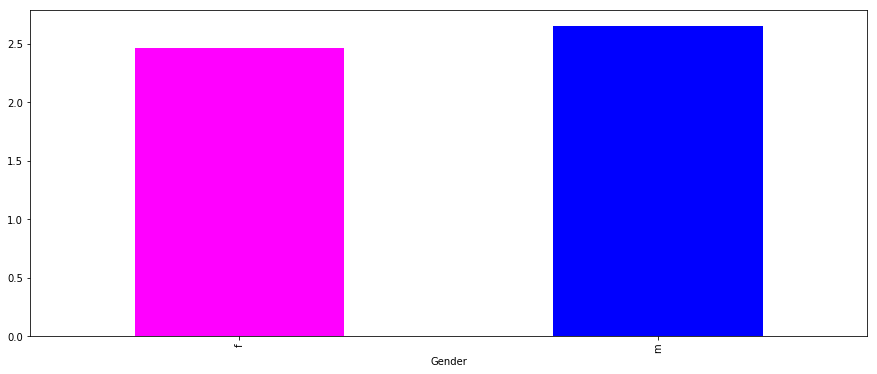

In [37]:
kband_by_gender = all_movies_df_2.groupby(['Gender'])['AVG_K_BAND'].describe()['mean']
kband_by_gender.plot.bar(color = ['magenta', 'blue', 'green'], figsize = (15,6))

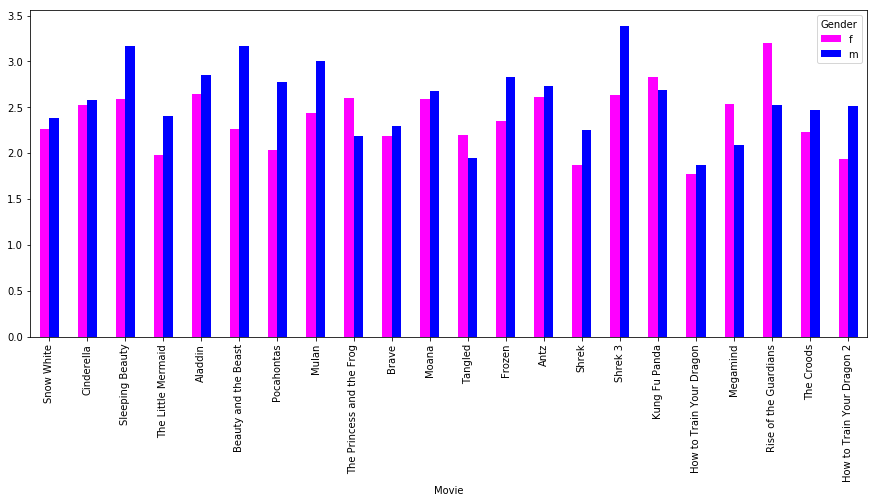

In [38]:
kband_by_gender = all_movies_df_2.groupby(['Movie','Gender'], sort=False)['AVG_K_BAND'].describe()['mean']
kband_by_gender.unstack().plot.bar(color = ['magenta', 'blue'], figsize = (15,6))

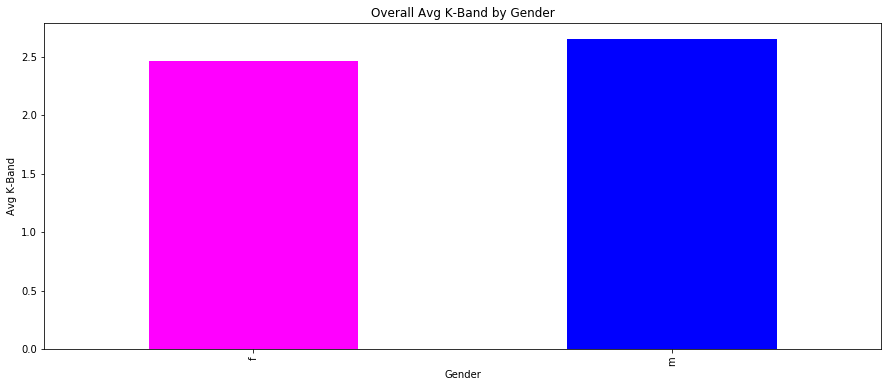

In [39]:
#overall....
kband_by_gender = all_movies_df_2.groupby(['Gender'], sort=False)['AVG_K_BAND'].describe()['mean']
kband_by_gender.plot.bar(color = ['magenta', 'blue'], figsize = (15,6))
#pretty low average k-band
#men slightly higher
plt.title('Overall Avg K-Band by Gender')
plt.ylabel('Avg K-Band')
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\overall_avg_kband_gen.png")

In [40]:
all_movies_df_2.groupby(['Movie','Gender'], sort=False)['AVG_K_BAND'].describe()

count      mean       std       min  \
Movie                      Gender                                        
Snow White                 f         2.0  2.261256  0.001574  2.260143   
                           m        12.0  2.388272  0.342640  1.750000   
Cinderella                 f         8.0  2.527713  1.180917  1.000000   
                           m         8.0  2.577604  1.020923  1.200000   
Sleeping Beauty            f         7.0  2.592904  0.472564  2.135550   
                           m         8.0  3.165264  0.872600  2.026846   
The Little Mermaid         f         8.0  1.984256  0.634475  1.100000   
                           m        15.0  2.408910  0.578287  1.476190   
Aladdin                    f         2.0  2.645324  0.784431  2.090647   
                           m        22.0  2.850286  1.172629  1.000000   
Beauty and the Beast       f         8.0  2.264813  0.979756  1.250000   
                           m        17.0  3.169270  2.441095  1.745731   
Pocahontas                 f         3.0  2.039905  0.205315  1.888889   
                           m        13.0  2.775060  1.650961  1.792553   
Mulan                      f         5.0  2.439353  0.278530  2.131054   
                           m        26.0  3.010342  2.194790  1.000000   
The Princess and the Frog  f         7.0  2.599769  1.714514  1.200000   
                           m        23.0  2.188354  0.779760  1.000000   
Brave                      f         3.0  2.188612  0.039611  2.143406   
                           m         8.0  2.296926  0.667528  1.636364   
Moana                      f         5.0  2.587053  1.384998  1.583333   
                           m        12.0  2.677175  2.399940  1.000000   
Tangled                    f         4.0  2.195240  0.390642  1.833333   
                           m        12.0  1.949501  0.605082  1.000000   
Frozen                     f        18.0  2.352669  1.178596  1.000000   
                           m        30.0  2.835317  1.690472  1.000000   
Antz                       f         7.0  2.614941  1.628542  1.387097   
                           m        13.0  2.729052  1.785248  1.000000   
Shrek                      f         3.0  1.871975  0.498932  1.333333   
                           m        28.0  2.256594  1.609005  1.000000   
Shrek 3                    f        17.0  2.636310  1.412874  1.000000   
                           m        32.0  3.387265  1.815859  1.000000   
Kung Fu Panda              f         6.0  2.829703  2.046156  1.000000   
                           m        16.0  2.691509  0.874315  1.750000   
How to Train Your Dragon   f         3.0  1.773325  0.394150  1.333333   
                           m        11.0  1.869874  0.506274  1.000000   
Megamind                   f         2.0  2.534513  0.658298  2.069027   
                           m         9.0  2.086793  0.644028  1.000000   
Rise of the Guardians      f        10.0  3.199389  1.629867  1.500000   
                           m        12.0  2.523889  0.622185  2.000000   
The Croods                 f         4.0  2.227917  0.572352  1.826754   
                           m         4.0  2.465581  0.691402  1.922719   
How to Train Your Dragon 2 f         3.0  1.933802  0.077366  1.847619   
                           m        12.0  2.519399  0.772396  1.500000   

                                        25%       50%       75%        max  
Movie                      Gender                                           
Snow White                 f       2.260700  2.261256  2.261812   2.262369  
                           m       2.165242  2.383242  2.651367   2.948276  
Cinderella                 f       2.076117  2.253336  2.668041   5.041667  
                           m       1.884266  2.689497  3.483630   3.681818  
Sleeping Beauty            f       2.241117  2.387805  2.858085   3.428571  
                           m       2.698530  2.886364  3.660904   4.714286  
The Little Mer

In [41]:
#What if you average this over number of speakers?
#What if we look exclusively at male and female protagonists?

In [42]:
all_movies_df_2 = all_movies_df_2[all_movies_df_2.Role != 'N']

In [43]:
all_movies_df_2.info() #6 null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 0 to 631
Data columns (total 14 columns):
Disney_Period       216 non-null object
Gender              216 non-null object
Movie               216 non-null object
Role                216 non-null object
Speaker             216 non-null object
Speaker_Status      216 non-null object
Total_Tok_Count     216 non-null float64
Total_Toks          216 non-null object
Total_Type_Count    216 non-null float64
Total_Types         216 non-null object
Year                216 non-null object
TTR                 216 non-null float64
G_TTR               216 non-null float64
AVG_K_BAND          210 non-null float64
dtypes: float64(5), object(9)
memory usage: 17.7+ KB


In [44]:
all_movies_df_2.groupby(['Movie','Role','Gender'], sort=False)['AVG_K_BAND'].describe()

count      mean       std       min  \
Movie                      Role   Gender                                        
Snow White                 ANT    f         1.0  2.262369       NaN  2.262369   
                                  m         2.0  2.834794  0.160488  2.721311   
                           PRO    f         1.0  2.260143       NaN  2.260143   
                                  m         1.0  1.750000       NaN  1.750000   
                           HELPER m         9.0  2.359964  0.237777  2.000000   
Cinderella                 ANT    f         4.0  2.920673  1.437786  1.875000   
                                  m         0.0       NaN       NaN       NaN   
                           PRO    f         1.0  2.143156       NaN  2.143156   
                                  m         1.0  1.285714       NaN  1.285714   
                           HELPER f         1.0  2.249123       NaN  2.249123   
                                  m         3.0  2.251928  1.145295  1.200000   
Sleeping Beauty            ANT    f         1.0  2.852535       NaN  2.852535   
                           PRO    f         1.0  2.208661       NaN  2.208661   
                                  m         1.0  2.026846       NaN  2.026846   
                           HELPER f         4.0  2.415141  0.316285  2.135550   
The Little Mermaid         ANT    f         2.0  2.015194  0.037438  1.988722   
                                  m         4.0  1.974351  0.410581  1.476190   
                           PRO    f         1.0  1.915929       NaN  1.915929   
                                  m         1.0  2.776042       NaN  2.776042   
                           HELPER m         4.0  2.487001  0.135797  2.292398   
Aladdin                    ANT    m         7.0  2.631214  0.896568  1.000000   
                           PRO    f         1.0  2.090647       NaN  2.090647   
                                  m         1.0  2.670528       NaN  2.670528   
                           HELPER m         3.0  3.935417  2.586726  2.384683   
Beauty and the Beast       ANT    m         6.0  2.996093  1.329105  2.150082   
                           PRO    f         1.0  1.983420       NaN  1.983420   
                                  m         3.0  1.988742  0.274006  1.745731   
                           HELPER f         2.0  1.886987  0.177898  1.761194   
                                  m         3.0  2.336967  0.634124  1.821429   
Pocahontas                 ANT    m         2.0  2.106750  0.010016  2.099668   
...                                         ...       ...       ...       ...   
Shrek 3                    PRO    f         1.0  2.934555       NaN  2.934555   
                                  m         2.0  2.130222  0.184162  2.000000   
                           HELPER f         5.0  2.586901  1.039566  1.000000   
                                  m         6.0  2.803656  0.852002  2.131579   
Kung Fu Panda              ANT    m         1.0  2.218310       NaN  2.218310   
                           PRO    m         1.0  2.613928       NaN  2.613928   
                           HELPER f         2.0  2.189110  0.576801  1.781250   
                                  m         5.0  2.197851  0.189290  1.897436   
How to Train Your Dragon   ANT    m         1.0  1.950749       NaN  1.950749   
                           PRO    f         1.0  1.892523       NaN  1.892523   
                                  m         1.0  2.201826       NaN  2.201826   
                           HELPER f         1.0  2.094118       NaN  2.094118   
                                  m         3.0  2.136448  0.557633  1.745455   
Megamind                   ANT    m         1.0  2.110329       NaN  2.110329   
                           PRO    m         1.0  2.150427       NaN  2.150427   
                           HELPER m         1.0  2.017405       NaN  2.017405   
Rise of the Guardians      ANT    m         1.0  2.004677       NaN  2.00

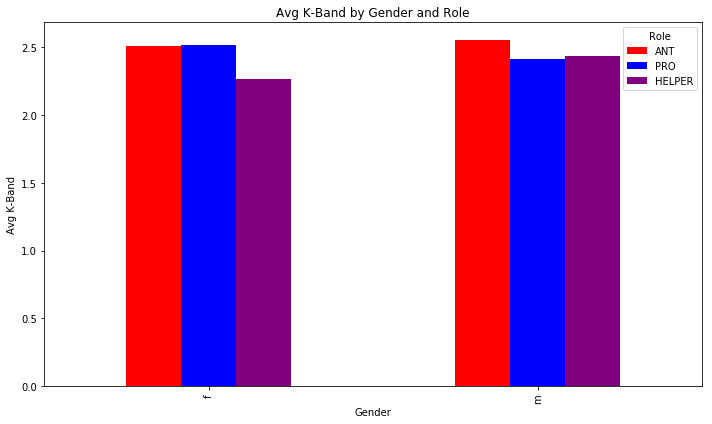

In [45]:
kband_by_movie_role_gender = all_movies_df_2.groupby(['Gender','Role'], sort=False)['AVG_K_BAND'].describe()['mean']
kband_by_movie_role_gender.unstack().plot.bar(color = ['red', 'blue', 'purple'], figsize = (10,6))
plt.title('Avg K-Band by Gender and Role')
plt.ylabel('Avg K-Band')
plt.tight_layout()
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\avg_kband_gen_role.png")

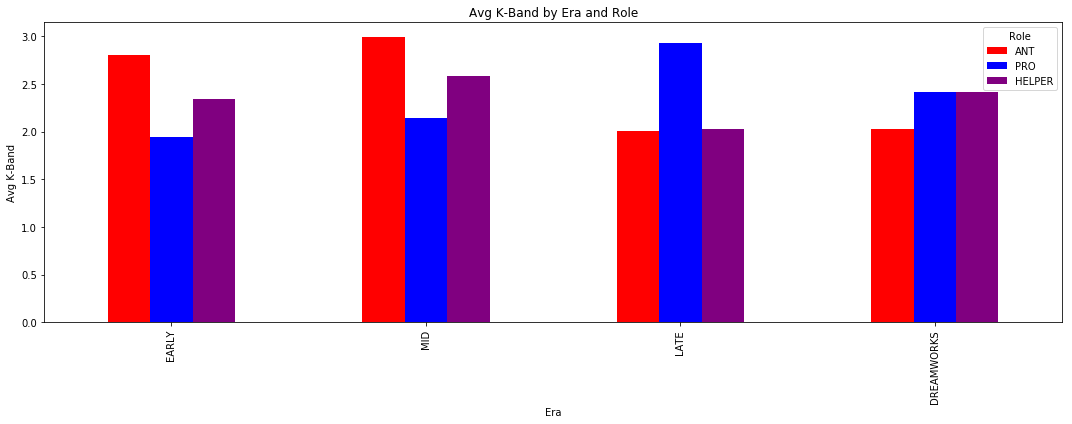

In [46]:
kband_by_era_role = all_movies_df_2.groupby(['Disney_Period','Role'], sort=False)['AVG_K_BAND'].describe()['mean']
kband_by_era_role.unstack().plot.bar(color = ['red', 'blue', 'purple'], figsize = (15,6))
plt.title("Avg K-Band by Era and Role")
plt.ylabel('Avg K-Band')
plt.xlabel('Era')
plt.tight_layout()
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\avg_kband_era_role.png")

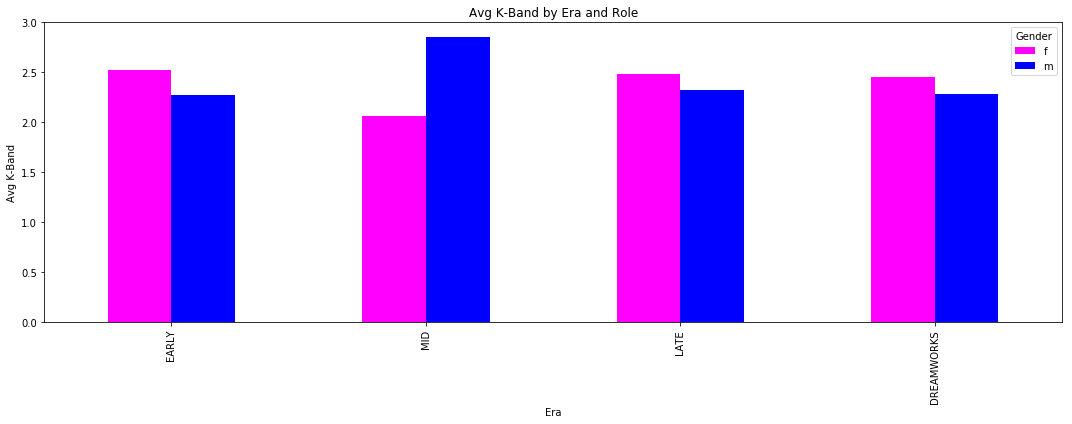

In [47]:
kband_by_era_gen = all_movies_df_2.groupby(['Disney_Period','Gender'], sort=False)['AVG_K_BAND'].describe()['mean']
kband_by_era_gen.unstack().plot.bar(color = ['magenta', 'blue'], figsize = (15,6))
plt.title("Avg K-Band by Era and Role")
plt.ylabel('Avg K-Band')
plt.xlabel('Era')
plt.tight_layout()
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\avg_kband_era_role.png")

So... female protagonists and female helpers average a higher k-band than male protagonists and male speakers...

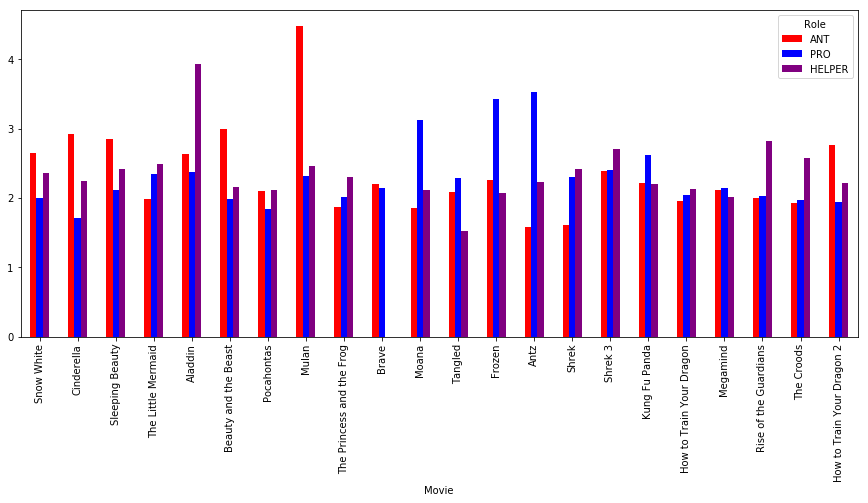

In [48]:
kband_by_movie_role = all_movies_df_2.groupby(['Movie','Role'], sort=False)['AVG_K_BAND'].describe()['mean']
kband_by_movie_role.unstack().plot.bar(color = ['red', 'blue', 'purple', 'green'], figsize = (15,6))

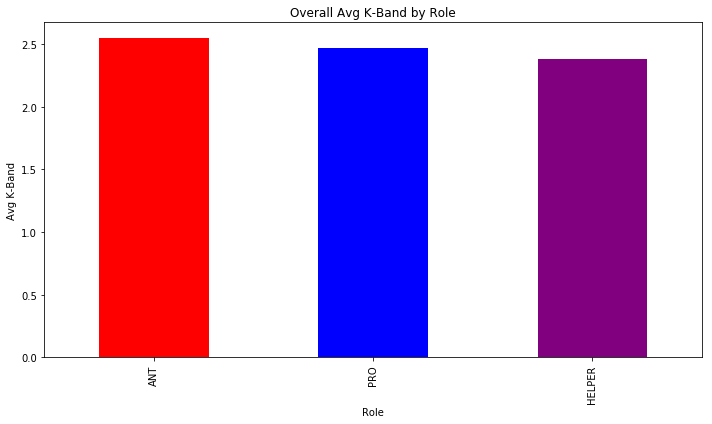

In [49]:
#villlains seem to have higher k-bands in older movies, but this has decreased over time
kband_by_role = all_movies_df_2.groupby(['Role'], sort=False)['AVG_K_BAND'].describe()['mean']
kband_by_role.plot.bar(color = ['red', 'blue', 'purple'], figsize = (10,6))
plt.title("Overall Avg K-Band by Role")
plt.ylabel('Avg K-Band')
plt.tight_layout()
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\overall_avg_kband_role.png")

In [50]:
all_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 14 columns):
Disney_Period       632 non-null object
Gender              632 non-null object
Movie               632 non-null object
Role                632 non-null object
Speaker             632 non-null object
Speaker_Status      632 non-null object
Total_Tok_Count     632 non-null float64
Total_Toks          632 non-null object
Total_Type_Count    632 non-null float64
Total_Types         632 non-null object
Year                632 non-null object
TTR                 632 non-null float64
G_TTR               632 non-null float64
AVG_K_BAND          600 non-null float64
dtypes: float64(5), object(9)
memory usage: 46.9+ KB


In [51]:
all_movies_df.to_pickle(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\private\char_tok_type_TTR.pkl")